In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset/Salary_dataset.csv")

In [3]:
df.head(10)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [5]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [6]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [7]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

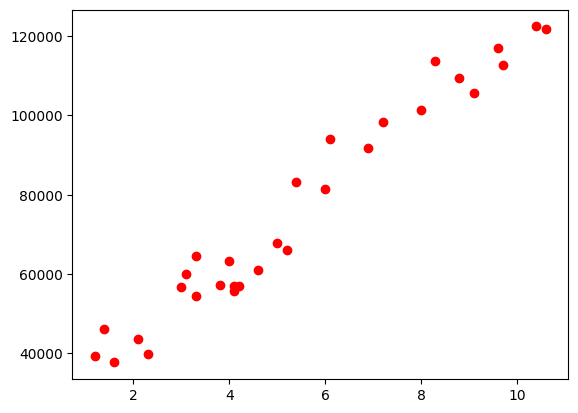

In [8]:
plt.scatter(df["YearsExperience"], df["Salary"], color="red")

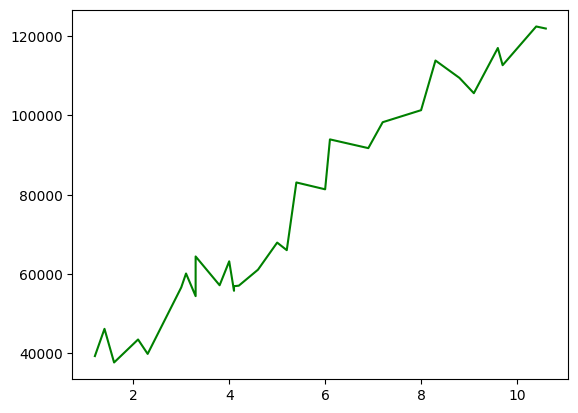

In [9]:
plt.plot(df["YearsExperience"], df["Salary"], color="green")

<BarContainer object of 30 artists>

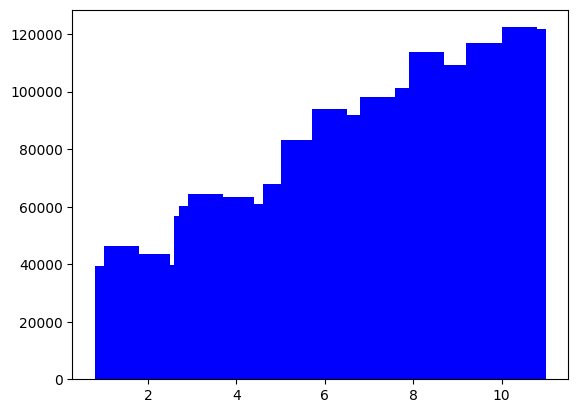

In [10]:
plt.bar(df["YearsExperience"], df["Salary"], color="blue")

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
X = df[["YearsExperience"]]
y = df[["Salary"]]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (24, 1)
Test set size: (6, 1)


In [15]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [16]:
print("Intercept (b0):", regressor.intercept_)
print("Slope (b1):", regressor.coef_[0])

Intercept (b0): [24380.20147947]
Slope (b1): [9423.81532303]


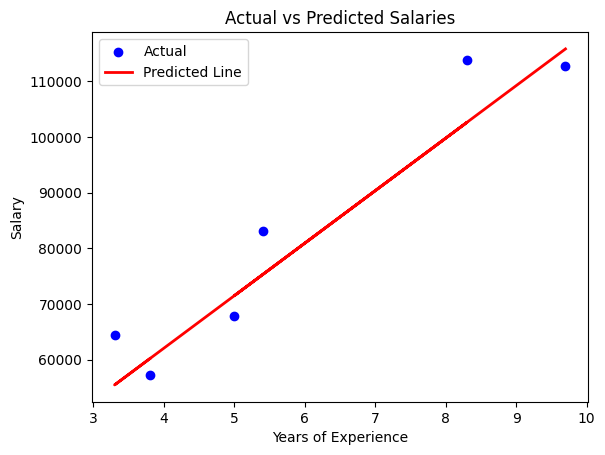

In [17]:
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Actual vs Predicted Salaries")
plt.legend()
plt.show()


In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 49830096.855908334
Root Mean Squared Error (RMSE): 7059.043621901506


In [20]:
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m, c = 0.0, 0.0 
    n = len(y)
    costs = []

    for epoch in range(epochs):
        y_pred = m * X + c
        error = y - y_pred
        dm = -(2/n) * np.sum(X * error)
        dc = -(2/n) * np.sum(error)
        m -= learning_rate * dm
        c -= learning_rate * dc
        cost = np.mean(error ** 2)
        costs.append(cost)

    return m, c, costs


Manual Gradient Descent Results:
Slope (m): 9504.801321957242
Intercept (c): 24474.557566113308


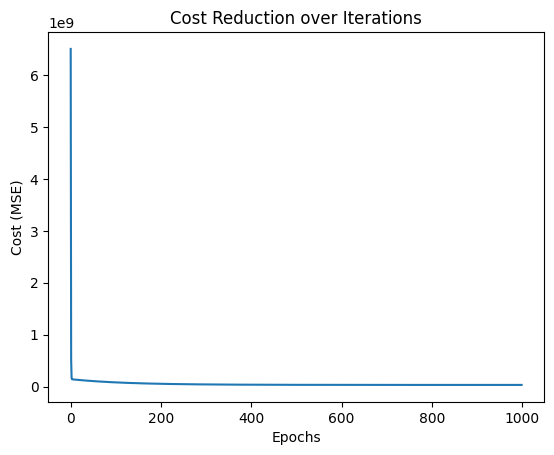

In [21]:
X_flat = X.values.flatten()   
y_flat = y.values.flatten() 
m, c, costs = gradient_descent(X_flat, y_flat, learning_rate=0.01, epochs=1000)

print("Manual Gradient Descent Results:")
print("Slope (m):", m)
print("Intercept (c):", c)
plt.plot(range(len(costs)), costs)
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.title("Cost Reduction over Iterations")
plt.show()


In [22]:
y_pred_manual = m * X_flat + c
y_pred = regressor.predict(X_test)

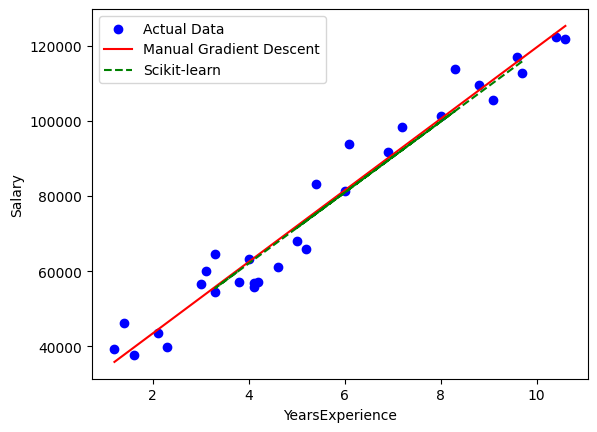

In [23]:
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred_manual, color="red", label="Manual Gradient Descent")
plt.plot(X_test, y_pred, color="green", linestyle="dashed", label="Scikit-learn")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [24]:
mse_manual = mean_squared_error(y, y_pred_manual)
mse_sklearn = mean_squared_error(y_test, y_pred)
print("\nMSE Manual:", mse_manual)
print("MSE Scikit-learn:", mse_sklearn)


MSE Manual: 31300260.021449663
MSE Scikit-learn: 49830096.855908334
